In [12]:
# import package

# model
import copy
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchsummary import summary
from torch import optim
from torch.optim.lr_scheduler import StepLR


# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# load dataset
train_ds = torchvision.datasets.ImageFolder(
    root="baby_data/train", transform=transforms.ToTensor())
val_ds = torchvision.datasets.ImageFolder(
    root="baby_data/val", transform=transforms.ToTensor())


print(len(train_ds))
print(len(val_ds))

print(type(train_ds))
print(type(val_ds))

print(train_ds)
print(val_ds)


7730
300
<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torchvision.datasets.folder.ImageFolder'>
Dataset ImageFolder
    Number of datapoints: 7730
    Root location: baby_data/train
    StandardTransform
Transform: ToTensor()
Dataset ImageFolder
    Number of datapoints: 300
    Root location: baby_data/val
    StandardTransform
Transform: ToTensor()


In [14]:
# To normalize the dataset, calculate the mean and std
train_meanRGB = [np.mean(x.numpy(), axis=(1, 2)) for x, _ in train_ds]
train_stdRGB = [np.std(x.numpy(), axis=(1, 2)) for x, _ in train_ds]

train_meanR = np.mean([m[0] for m in train_meanRGB])
train_meanG = np.mean([m[1] for m in train_meanRGB])
train_meanB = np.mean([m[2] for m in train_meanRGB])
train_stdR = np.mean([s[0] for s in train_stdRGB])
train_stdG = np.mean([s[1] for s in train_stdRGB])
train_stdB = np.mean([s[2] for s in train_stdRGB])


val_meanRGB = [np.mean(x.numpy(), axis=(1, 2)) for x, _ in val_ds]
val_stdRGB = [np.std(x.numpy(), axis=(1, 2)) for x, _ in val_ds]

val_meanR = np.mean([m[0] for m in val_meanRGB])
val_meanG = np.mean([m[1] for m in val_meanRGB])
val_meanB = np.mean([m[2] for m in val_meanRGB])

val_stdR = np.mean([s[0] for s in val_stdRGB])
val_stdG = np.mean([s[1] for s in val_stdRGB])
val_stdB = np.mean([s[2] for s in val_stdRGB])

print(train_meanR, train_meanG, train_meanB)
print(val_meanR, val_meanG, val_meanB)


0.20443186 0.622418 0.4943464
0.1723546 0.5275659 0.5340862


In [15]:
# define the image transformation
train_transformation = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize(228),
    transforms.Normalize([train_meanR, train_meanG, train_meanB], [
                         train_stdR, train_stdG, train_stdB]),
    # transforms.RandomHorizontalFlip()
])

val_transformation = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize(228),
    transforms.Normalize([train_meanR, train_meanG, train_meanB], [
                         train_stdR, train_stdG, train_stdB]),
])

# apply transforamtion
train_ds.transform = train_transformation
val_ds.transform = val_transformation

# create DataLoader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=True)


In [16]:
print(np.random.randint(0,7729,4))

[1167 5097 5716 4144]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [2732 2607 1653 3264]
torch.Size([3, 499, 145])
[tensor([[[ 4.2671,  4.4481,  2.1674,  ..., -0.4029, -0.7287, -0.6925],
         [ 1.8416,  3.5793,  1.8416,  ..., -0.3305, -0.6201, -0.6563],
         [ 3.5069,  3.5069,  2.6018,  ..., -0.4029, -0.4391, -0.4391],
         ...,
         [ 0.9727,  1.7330,  1.9140,  ..., -0.4753, -0.6563, -0.5839],
         [ 0.5745,  2.6018,  2.7828,  ..., -0.6563, -0.7287, -0.6925],
         [ 1.0451, -0.0409,  0.7555,  ..., -0.7650, -0.8012, -0.8012]],

        [[ 2.2545,  2.2919,  1.7683,  ..., -1.4105, -0.5504, -0.7000],
         [ 1.6935,  2.1423,  1.6935,  ..., -1.6349, -0.8870, -0.7748],
         [ 2.1049,  2.1049,  1.9179,  ..., -1.4479, -1.3357, -1.3357],
         ...,
         [ 1.3569,  1.6561,  1.6935,  ..., -1.2983, -0.7748, -0.9992],
         [ 1.1699,  1.9179,  1.9553,  ..., -0.7374, -0.5504, -0.6626],
         [ 1.3943,  0.8708,  1.2821,  ..., -0.4382, -0.1390, -0.1390]],

        [[-4.1471, -4.3652, -2.1842,  ...,  0.8692, 

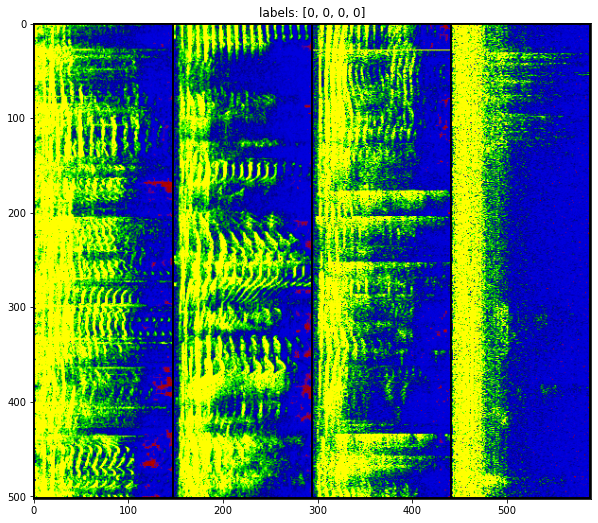

In [79]:
# display sample images
def show(img, y=None, color=True):
    print(f"img 나오신다 : {img}")
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels: ' + str(y))


np.random.seed(0)
torch.manual_seed(0)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print("image indices:", rnd_inds)
print(train_ds[2732][0].shape)
x_grid = [train_ds[i][0] for i in rnd_inds]
print(x_grid)
y_grid = [train_ds[i][1] for i in rnd_inds]
print(f"y_grid : {y_grid}")

x_grid = utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

# call helper function
plt.figure(figsize=(10, 10))
show(x_grid, y_grid)